# Task 1
Load in the dataset with the yearly number of deaths

In [1]:
import pandas as pd

In [2]:
# loading of dataset
yearly = pd.read_csv(r"C:\Users\intel\Desktop\Internship\New folder\yearly_deaths_by_clinic.csv")

In [3]:
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


# Task 2
Calculate the proportion of deaths.

In [4]:

yearly['proportion_deaths'] = yearly['deaths']/yearly['births']

In [5]:
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [6]:
# Extracting rows from clinic 1 and clinic 2 into yearly1 and yearly2 respectively
yearly1= yearly[yearly['clinic'] == 'clinic 1']
yearly2= yearly[yearly['clinic'] == 'clinic 2']

In [7]:
print(yearly1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


In [8]:
print(yearly2)

    year  births  deaths    clinic  proportion_deaths
6   1841    2442      86  clinic 2           0.035217
7   1842    2659     202  clinic 2           0.075968
8   1843    2739     164  clinic 2           0.059876
9   1844    2956      68  clinic 2           0.023004
10  1845    3241      66  clinic 2           0.020364
11  1846    3754     105  clinic 2           0.027970


# Task 3
Plot the yearly proportion of deaths for both clinics.

Text(0, 0.5, 'proprtion_deaths')

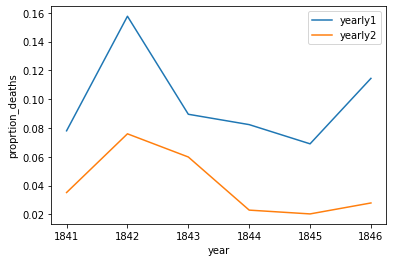

In [9]:
ax = yearly1.plot(x="year", y="proportion_deaths",
              label="yearly1")
yearly2.plot(x="year", y="proportion_deaths",
         label="yearly2", ax=ax)
ax.set_ylabel("proprtion_deaths")

# Task 4
Load in the dataset with the monthly number of deaths for Clinic 1

In [10]:
# loading of dataset
monthly = pd.read_csv(r"C:\Users\intel\Desktop\Internship\New folder\monthly_deaths.csv",parse_dates=['date'])

In [11]:
# Calculate the proportion of deaths per number of births
monthly['proportion_deaths'] = monthly['deaths']/monthly['births']

In [12]:
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


# Task 5
Plot the monthly proportion of deaths for Clinic 1.

Text(0, 0.5, 'Proprtion deaths')

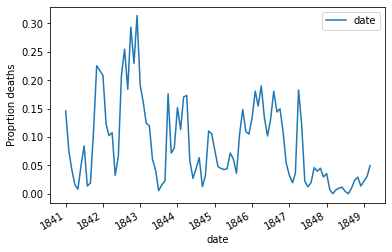

In [13]:
ax = monthly.plot(x="date", y="proportion_deaths",
              label="date")
ax.set_ylabel("Proprtion deaths")

# Task 6
Make a plot that highlights the effect of handwashing

In [14]:
# Splitting of dataset into 'before_washing' and 'after_washing'
# Handwashing introduced in 1847 
# The proportion of deaths decreses from date '1847-06-01' 
before_washing = monthly[monthly["date"] < '1847-06-01']
after_washing = monthly[monthly["date"] >= '1847-06-01']

In [15]:
before_washing.tail()

,date,births,deaths,proportion_deaths
71,1847-01-01,311,10,0.032154
72,1847-02-01,312,6,0.019231
73,1847-03-01,305,11,0.036066
74,1847-04-01,312,57,0.182692
75,1847-05-01,294,36,0.122449


In [16]:
after_washing.head()

,date,births,deaths,proportion_deaths
76,1847-06-01,268,6,0.022388
77,1847-07-01,250,3,0.012000
78,1847-08-01,264,5,0.018939
79,1847-09-01,262,12,0.045802
80,1847-10-01,278,11,0.039568


Text(0, 0.5, 'Proprtion deaths')

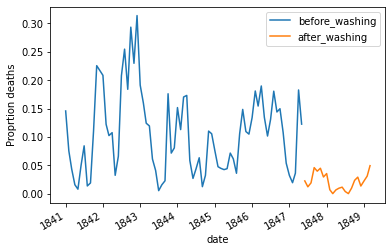

In [17]:
ax = before_washing.plot(x="date", y="proportion_deaths",
              label="before_washing")
after_washing.plot(x="date", y="proportion_deaths",
         label="after_washing", ax=ax)
ax.set_ylabel("Proprtion deaths")

# Task 7

Calculate the average reduction in proportion of deaths due to handwashing.

In [18]:
# selection of proportion_deaths column 
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']

In [19]:
# calculate the average reduction in proportion of deaths due to handwashing
mean_diff = after_proportion.mean() - before_proportion.mean() 

In [20]:
print(mean_diff)

-0.08395660751183336


In [21]:
# Negative sign indicates that there is a reduction in proportion of deaths due to hanwashing
# Approximately 8% reduction  

# Task 8
Make a bootstrap analysis of the difference in mean monthly proportion of deaths.

In [22]:
# Setting  the number of bootstrap iterations
num_iterations = 3000

# Perform bootstrap analysis of the difference in mean monthly proportion of deaths
boot_mean_diff = []
for i in range(num_iterations):
    # Sample with replacement from before_proportion and after_proportion using pandas' sample method
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    
    # Calculate the difference in means
    diff = boot_after.mean() - boot_before.mean()
    
    # Append the difference to boot_mean_diff
    boot_mean_diff.append(diff)


In [23]:
# Converting  the list of bootstrap estimates to a pandas Series
boot_mean_series = pd.Series(boot_mean_diff)

#Calculate a 95% confidence_interval as the 2.5% and 97.5% quantiles of boot_mean_diff
ci_low = boot_mean_series.quantile(0.025)
ci_high = boot_mean_series.quantile(0.975)

# Print the confidence interval
print("95% Confidence Interval:", ci_low, ci_high)


95% Confidence Interval: -0.10101278582510166 -0.06662962047213918


In [24]:
# From above calculatiohandwashing reduced the proportion of deaths between 6.7% and 10% , according to a 95% confidence interval. 

# Task 9
Given the data Semmelweis collected, is it True or False that doctors should wash their hands?

In [25]:
# The ans is 'True' i.e Doctor should wash their hands